## 가치주 효과
### 가치주(저PBR, 저PER)
### 내재 가치 대비 낮은 가격의 주식( 저PER, 저 PBR등)이
### 내재 가치 대비 비싼 주식( 고PER , 고PBR) 보다 수익률이 높은 현상

### 가치주 효과가 발생하는 원인은 사람들이 가치주를 기피하고 성장주를 선호하기 때문
### 가치주는 일반적으로 차입비율이 높고, 수익의 변동성이 크며, 경기가 좋지 않을 때 더 위험
### 위험한 주식에 필요 이상으로 과민 반응 
### 그래서 주가가 하락하고 가치주가 됨
### 인간은 익숙한 것을 안전하다고 착각하는 경향있음
### 최근 성과가 좋은 주식은 여러 매체를 통해 접하기 쉽고, 이런 주식이 안전하다고 착가해 많은 사람이 매수함
### 그래서 주가가 상승하고 고평가주가 됨
### -확증 편향-
### 위험하다고 생각되는 가치주가 망할 것 같은 이유만 찾아 더욱 기피
### 안전하다고 생각되는 성장주는 상승할 것 같은 이유만 찾아 더욱 선호
### 가치주가 생각보다 위험하지 않다는 것을, 성장주가 너무 많이 상승해 안전하지 않다는 것을 깨닫는 순간 주가는 원래 수준으로 회귀
### 이로 인해 가치주 효과 발생

### 프렌치 라이브러리

- PBR = B/M
- PER = E/P
- PCR = CF/P

In [9]:
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets
import pandas as pd
import yfinance as yf
import csv
import bt

In [2]:
datasets = get_available_datasets()
# https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_BE-ME_CSV.zip

In [3]:
df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME','famafrench', start='1900-01-01')

In [4]:
df_pbr

{0:           <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  \
 Date                                                                      
 1926-07  12.07   5.55    1.86   1.54   3.18   5.41   1.78   2.41   0.60   
 1926-08  -9.73   2.65    2.67   5.61   1.00   4.01   2.05   4.59   7.10   
 1926-09 -15.16   1.28    0.07  -0.71  -1.04   3.04  -0.29  -0.19  -1.46   
 1926-10  -5.63  -3.60   -2.41  -3.55  -2.89  -2.96  -2.20  -4.20  -4.28   
 1926-11   5.58   3.13    2.95   2.94   4.12   2.56   1.90   3.96   2.48   
 ...        ...    ...     ...    ...    ...    ...    ...    ...    ...   
 2023-01   6.26   7.63    6.04   5.47   8.89   3.72   7.38   4.95   6.22   
 2023-02  -3.15  -1.41   -3.68  -3.51  -1.36  -2.23  -3.90  -3.81  -2.80   
 2023-03   1.84   6.52   -1.29  -5.69   7.49   2.27  -0.15  -3.91  -7.95   
 2023-04   2.50   0.99    0.45   1.77   0.88   0.81   0.47   1.47   2.19   
 2023-05  -4.27   3.92   -4.11  -6.13   5.16  -1.23  -4.36  -6.26  -4.80   
 
       

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'Malgun Gothic' # window
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

<Axes: title={'center': 'PBR별 포트폴리오의 누적 수익률'}, xlabel='Date'>

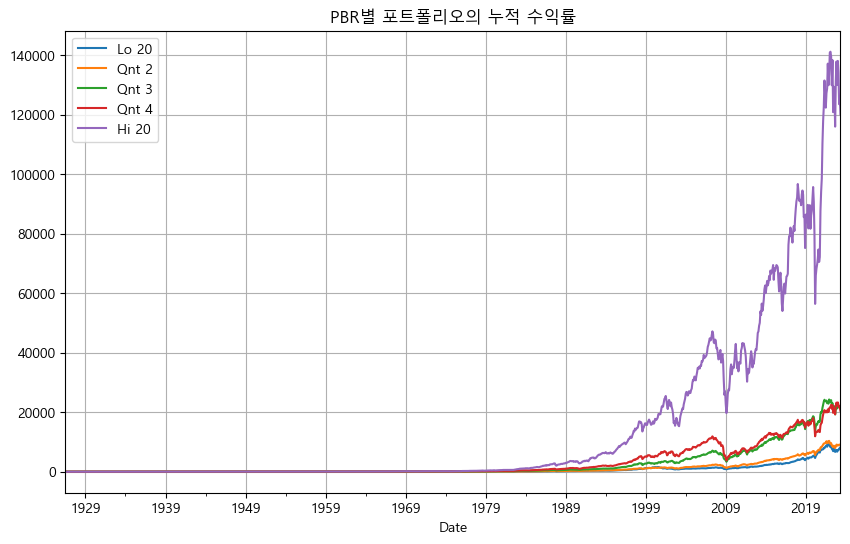

In [6]:
df_pbr_vw = df_pbr[0].loc[:,['Lo 20','Qnt 2','Qnt 3', 'Qnt 4', 'Hi 20']] # 5분위로 나눈 열만 선택한 후 df_pbr_vw로 받아줌
df_pbr_cum = (1+ df_pbr_vw / 100).cumprod() # df_pbr_vw에 숫자를 수익률로 적절히 계산하기 위해 100으로 나눈 후 1+r.cumprod() -> 누적수익률

df_pbr_cum.plot(figsize=(10,6),title='PBR별 포트폴리오의 누적 수익률')

Hi20 저PBR 이 높은 수익률을 보여줌
위 그래프의 경우 그래프 왜곡이 심함 그래서 Y축을 일반이 아닌 로그로 바꿔야함
- (1+r) = eR  r = 단순수익률 / R = 로그 수익률
- ln(1+r) = R 

<Axes: title={'center': 'PBR별 포트폴리오의 누적 수익률'}, xlabel='Date'>

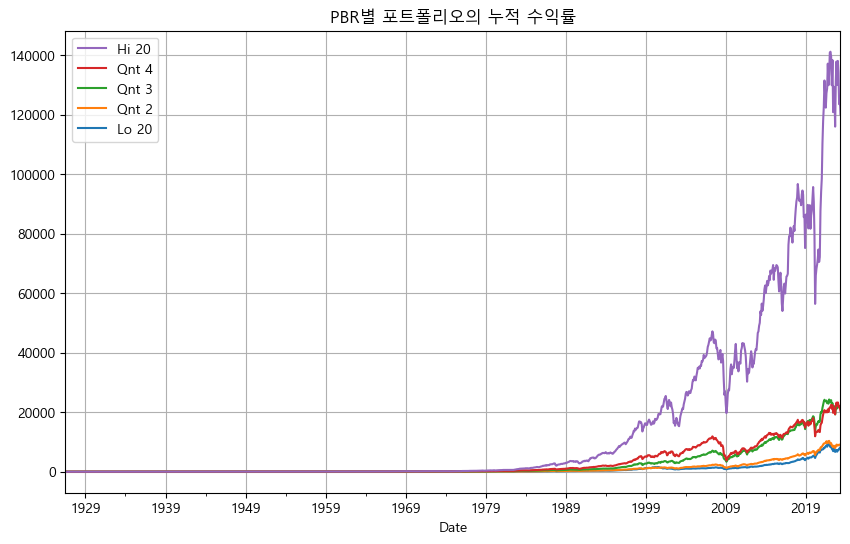

In [7]:
df_pbr_cum.plot(figsize=(10,6),
                legend='reverse', 
                title='PBR별 포트폴리오의 누적 수익률')

<Axes: title={'center': 'PBR별 포트폴리오의 누적수익률'}, xlabel='Date'>

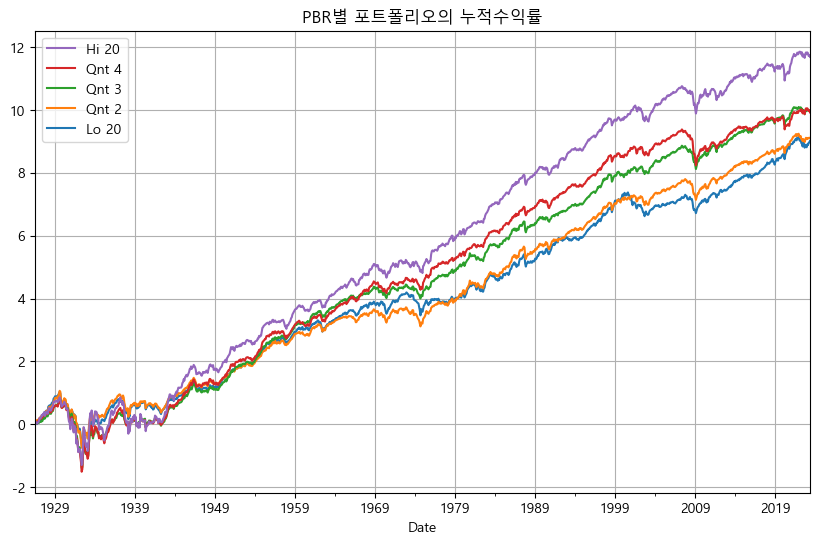

In [8]:
import numpy as np

df_pbr_cum = np.log(1+df_pbr_vw/100).cumsum()   # comsum() 누적 더하기
df_pbr_cum.plot(figsize=(10,6),
               legend='reverse',
               title='PBR별 포트폴리오의 누적수익률')

## 가치주 선정하기

### Value(PER, PBR 등이 Negative 인 경우 Quant에서는 제외시킴)

In [18]:
data = pd.read_csv('시총20230704.csv', encoding='utf-8-sig').dropna()
data.head()

,N,종목명,현재가,전일비,등락률,액면가,영업이익,매출액증가율,영업이익증가율,PER,ROE,PBR
0,1.0,삼성전자,73100.0,100.0,+0.14%,100.0,433766.0,8.09,-15.99,11.03,17.07,1.42
1,2.0,LG에너지솔루션,569000.0,4000.0,-0.70%,500.0,12137.0,43.39,57.94,127.87,5.75,6.78
2,3.0,SK하이닉스,118100.0,500.0,+0.43%,5000.0,68094.0,3.78,-45.13,-36.91,3.56,1.33
3,4.0,삼성바이오로직스,750000.0,7000.0,+0.94%,2500.0,9836.0,91.41,83.07,67.13,11.42,5.85
5,6.0,삼성SDI,712000.0,5000.0,-0.70%,5000.0,18080.0,48.48,69.36,24.63,12.52,2.77


In [28]:
data_rank = data[['PER','PBR']].rank(axis=0)
data_rank

TypeError: tuple indices must be integers or slices, not list

In [ ]:
data_sum = data_rank.sum(axis=1, skipna=False).rank()
data_sum

In [ ]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_deposit.nhn'
data = rq.get(url)
data_html = BeautifulSoup(data.content)
parse_day = data_html.select_one(
    'div.subtop_sise_graph2 > ul.subtop_chart_note > li > span.tah').text

print(parse_day)

In [ ]:
import re

biz_day = re.findall('[0-9]+', parse_day)
biz_day = ''.join(biz_day)

print(biz_day)

In [ ]:
import requests as rq
from io import BytesIO
import pandas as pd

gen_otp_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
gen_otp_stk = {
    'mktId': 'STK',
    'trdDd': biz_day,
    'money': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': 'dbms/MDC/STAT/standard/MDCSTAT03901'
}
headers = {'Referer': 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader'}
otp_stk = rq.post(gen_otp_url, gen_otp_stk, headers=headers).text

print(otp_stk)

In [ ]:
down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
down_sector_stk = rq.post(down_url, {'code': otp_stk}, headers=headers)
sector_stk = pd.read_csv(BytesIO(down_sector_stk.content), encoding='EUC-KR')

sector_stk.head()

In [ ]:
gen_otp_ksq = {
    'mktId': 'KSQ',  # 코스닥 입력
    'trdDd': biz_day,
    'money': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': 'dbms/MDC/STAT/standard/MDCSTAT03901'
}
otp_ksq = rq.post(gen_otp_url, gen_otp_ksq, headers=headers).text

down_sector_ksq = rq.post(down_url, {'code': otp_ksq}, headers=headers)
sector_ksq = pd.read_csv(BytesIO(down_sector_ksq.content), encoding='EUC-KR')

sector_ksq.head()

In [ ]:
krx_sector = pd.concat([sector_stk, sector_ksq]).reset_index(drop=True)
krx_sector['종목명'] = krx_sector['종목명'].str.strip()
krx_sector['기준일'] = biz_day

krx_sector.head()

In [ ]:
import requests as rq
from io import BytesIO
import pandas as pd

gen_otp_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
gen_otp_data = {
    'searchType': '1',
    'mktId': 'ALL',
    'trdDd': biz_day,
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': 'dbms/MDC/STAT/standard/MDCSTAT03501'
}
headers = {'Referer': 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader'}
otp = rq.post(gen_otp_url, gen_otp_data, headers=headers).text

down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
krx_ind = rq.post(down_url, {'code': otp}, headers=headers)

krx_ind = pd.read_csv(BytesIO(krx_ind.content), encoding='EUC-KR')
krx_ind['종목명'] = krx_ind['종목명'].str.strip()
krx_ind['기준일'] = biz_day

krx_ind.head()

In [ ]:
diff = list(set(krx_sector['종목명']).symmetric_difference(set(krx_ind['종목명'])))
print(diff)

In [ ]:
kor_ticker = pd.merge(krx_sector,
                      krx_ind,
                      on=krx_sector.columns.intersection(
                          krx_ind.columns).tolist(),
                      how='outer')

kor_ticker.head()

In [ ]:
import numpy as np

kor_ticker['종목구분'] = np.where(kor_ticker['종목명'].str.contains('스팩|제[0-9]+호'), '스팩',
                              np.where(kor_ticker['종목코드'].str[-1:] != '0', '우선주',
                                       np.where(kor_ticker['종목명'].str.endswith('리츠'), '리츠',
                                                np.where(kor_ticker['종목명'].isin(diff),  '기타',
                                                '보통주'))))
kor_ticker = kor_ticker.reset_index(drop=True)
kor_ticker.columns = kor_ticker.columns.str.replace(' ', '')
kor_ticker = kor_ticker[['종목코드', '종목명', '시장구분', '종가',
                         '시가총액', '기준일', 'EPS', '선행EPS', 'BPS', '주당배당금', '종목구분']]
kor_ticker = kor_ticker.replace({np.nan: None})
kor_ticker['기준일'] = pd.to_datetime(kor_ticker['기준일'])

kor_ticker.head()

In [ ]:
import pymysql

con = pymysql.connect(user='root',
                      passwd='dowksi123!@#',
                      host='127.0.0.1',
                      db='stock_db',
                      charset='utf8')

mycursor = con.cursor()
query = f"""
    insert into kor_ticker (종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,선행EPS,BPS,주당배당금,종목구분)
    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s) as new
    on duplicate key update
    종목명=new.종목명,시장구분=new.시장구분,종가=new.종가,시가총액=new.시가총액,EPS=new.EPS,선행EPS=new.선행EPS,
    BPS=new.BPS,주당배당금=new.주당배당금,종목구분 = new.종목구분;
"""

args = kor_ticker.values.tolist()

mycursor.executemany(query, args)
con.commit()

con.close()

In [ ]:
import json
import requests as rq
import pandas as pd

url = f'''http://www.wiseindex.com/Index/GetIndexComponets?ceil_yn=0&dt={biz_day}&sec_cd=G10'''
data = rq.get(url).json()

type(data)

In [ ]:
data_pd = pd.json_normalize(data['list'])

data_pd.head()

In [ ]:
import time
import json
import requests as rq
import pandas as pd
from tqdm import tqdm

sector_code = [
    'G25', 'G35', 'G50', 'G40', 'G10', 'G20', 'G55', 'G30', 'G15', 'G45'
]

data_sector = []

for i in tqdm(sector_code):
    url = f'''http://www.wiseindex.com/Index/GetIndexComponets?ceil_yn=0&dt={biz_day}&sec_cd={i}'''    
    data = rq.get(url).json()
    data_pd = pd.json_normalize(data['list'])

    data_sector.append(data_pd)

    time.sleep(2)

kor_sector = pd.concat(data_sector, axis = 0)
kor_sector = kor_sector[['IDX_CD', 'CMP_CD', 'CMP_KOR', 'SEC_NM_KOR']]
kor_sector['기준일'] = biz_day
kor_sector['기준일'] = pd.to_datetime(kor_sector['기준일'])

In [8]:
import pymysql

con = pymysql.connect(
    user='root',
    passwd='dowksi123!@#',
    host='127.0.0.1',
    db='stock_db',
    charset='utf8'
)

mycursor = con.cursor()

In [9]:
query = """
    select * from kor_sector;
"""

mycursor.execute(query)  # excute를 통해 query를 data 변수 로 보내게됨 
data = mycursor.fetchall()  # fetchall()  서버로부터 data를 가져옴
con.close() # 데이터베이스와의 연결을 종료

display(data)  # 불러온 데이터 확인 

(('G10', '000440', '중앙에너비스', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '002960', '한국쉘석유', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '005090', 'SGC에너지', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '006120', 'SK디스커버리', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '009830', '한화솔루션', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '010950', 'S-Oil', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '013810', '스페코', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '014530', '극동유화', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '018000', '유니슨', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '024060', '흥구석유', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '032980', '바이온', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '038870', '에코바이오', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '043200', '파루', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '044490', '태웅', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '046120', '오르비텍', '에너지', datetime.date(2023, 7, 5)),
 ('G10', '060900', 'DGP', '에너지', datetime.date(2023, 7, 5)),
 ('G1

In [19]:
con = pymysql.connect(
    user='root',
    passwd='dowksi123!@#',
    host='127.0.0.1',
    db='database1',
    charset='utf8'
)

mycursor = con.cursor()
query = """
insert into 명부(id, name)
values('4','a')"""
mycursor.execute(query)
con.commit()
con.close()

In [24]:
import pymysql

con = pymysql.connect(
    user='root',
    passwd='dowksi123!@#',
    host='127.0.0.1',
    db='stock_db',
    charset='utf8'
)

mycursor = con.cursor()
query = """
select * from kor_ticker
where 기준일 = (select max(기준일) from kor_ticker) 
	and 종목구분 = '보통주';
"""

mycursor.execute(query)  # excute를 통해 query를 data 변수 로 보내게됨 
data = mycursor.fetchall()  # fetchall()  서버로부터 data를 가져옴
con.close() # 데이터베이스와의 연결을 종료

data
ticker_list = pd.DataFrame(data,columns=['종목코드','종목명','시장구분','종가','시가총액','기준일','EPS','선행EPS','BPS','주당배당금','종목구분'])
ticker_list.head()

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,선행EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,10370.0,2.896490e+11,2023-07-05,736.0,1317.0,13165.0,180.0,보통주
1,000040,KR모터스,KOSPI,575.0,5.527960e+10,2023-07-05,NaN,NaN,345.0,0.0,보통주
2,000050,경방,KOSPI,9700.0,2.659280e+11,2023-07-05,177.0,NaN,30304.0,125.0,보통주
3,000070,삼양홀딩스,KOSPI,72200.0,6.183400e+11,2023-07-05,9173.0,NaN,240995.0,3500.0,보통주
4,000080,하이트진로,KOSPI,21450.0,1.504370e+12,2023-07-05,1250.0,1424.0,16906.0,950.0,보통주


In [1]:
from sqlalchemy import create_engine
import numpy as np 
import pandas as pd
import mysql.connector

In [ ]:
# db_name = '명부'
# db_host = 'localhost'
# db_user = 'root'
# db_password = 'dowksi123!@#'